In [2]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 37.6 MB/s eta 0:00:0000:0100:01


# Introduction to Linear Programming

In this lab we will be solving a linear programing problem with two decision variables, x1 and x2.
The problem is to maximize the objective function 'x1+x2' subject to three linear constraints and
non negativity constrains and then find the optimum solution. Finally we will add an additional constraint
that makes this problem infeasible and see how the solver handles it.

## Constraints

```
4x1 - x2 <= 8
2x1 + x2 <= 10
5x1 - 2x2 >= -2
```

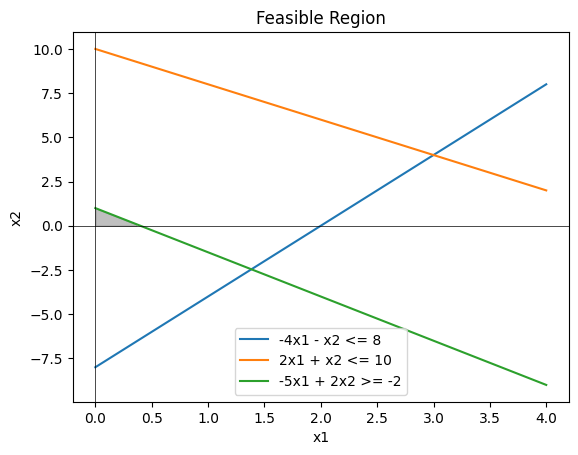

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constraints
x = np.linspace(0, 4, 100)
y1 = 4 * x - 8
y2 = 10 - 2 * x
y3 = (-2 + 5 * x) / (-2)

# Plot the constraints
plt.plot(x, y1, label='-4x1 - x2 <= 8')
plt.plot(x, y2, label='2x1 + x2 <= 10')
plt.plot(x, y3, label='-5x1 + 2x2 >= -2')

# Plot the non-negativity constraints
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Shade the feasible region
y4 = np.maximum(y1, 0)
y5 = np.minimum(y2, y3)
plt.fill_between(x, y4, y5, where=y4<y5, color='gray', alpha=0.5)

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Feasible Region')
plt.legend()
plt.show()


# Finding the Optimum Solution

The objective function is to maximize 'x1 + x2'. The feasible region is bounded by the constraints and the non negativity constraints further limit the feasible region to the first quadrant.

We will use the linprog function from scipy.optimize module to find the optimum solution

In [21]:
from scipy.optimize import linprog

# Define coefficients of the objective function
obj = [-1, -1]

# Define the coefficients of the LHS of the constraints
lhs_eq = [
    [4, -1],  # Constraint 1
    [2, 1],  # Constraint 2
]
lhs_ineq = [
    [-5, 2],  # Constraint 3
]

# Define the RHS of the constraints
rhs_eq = [
    8,  # Constraint 1
    10,  # Constraint 2
]
rhs_ineq = [
    -2,  # Constraint 3
]

lhs_ineq_2 = [
    [3, 2],  # Constraint 4
]

bounds = [(0, None),  # Bounds of x1
          (0, None)]  # Bounds of x2

opt = linprog(c=obj, A_eq=lhs_eq, b_eq=rhs_eq, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bounds,
              method="highs")

print("Optimum Solution: {}".format(opt.x))
print("x1 = {}, x2 = {}".format(opt.x[0], opt.x[1]))



Optimum Solution: [3. 4.]
x1 = 3.0, x2 = 4.0


In [32]:
from scipy.optimize import linprog

# Define coefficients of the objective function
obj = [-1, -1]

# Define the coefficients of the LHS of the constraints
lhs_eq = [
    [4, -1],  # Constraint 1
    [2, 1],  # Constraint 2
]
lhs_ineq = [
    [-5, 2],  # Constraint 3
]

# Define the RHS of the constraints
rhs_eq = [
    8,  # Constraint 1
    10,  # Constraint 2
]

rhs_ineq = [-2]  # Constraint 3

# Define the additional constraint
lhs_ineq_2 = [3, 2]
rhs_ineq_2 = 10

bounds = [(0, None),  # Bounds of x1
          (0, None)]  # Bounds of x2

# Define the A_ub and b_ub matrices
aUB = lhs_ineq + [lhs_ineq_2]
bUB = rhs_ineq + [rhs_ineq_2]

try:
    opt = linprog(c=obj, A_eq=lhs_eq, b_eq=rhs_eq, A_ub=aUB, b_ub=bUB, bounds=bounds,
                  method="highs")

    if opt.success:
        print("Optimum Solution: {}".format(opt.x))
        print("x1 = {}, x2 = {}".format(opt.x[0], opt.x[1]))
    else:
        print("No solution found!")
except ValueError as e:
    print("The problem is infeasible as there are no values of x satisfying all constraints.")


No solution found!
